In [1]:
# %load_ext autoreload
# %autoreload 2

# Rhine level prediction

Predict the rhine level in Bonn.

Source for the data:

    Wasserstraßen- und Schifffahrtsverwaltung des Bundes (WSV),
    bereitgestellt durch die Bundesanstalt für Gewässerkunde (BfG).

which (unofficially) translates to

    German Federal Waterways and Shipping Administration (WSV),
    provided by the German Federal Institute of Hydrology (BfG).

In [2]:
import pandas as pd
import numpy as np
from mllab.rhinelevel import wsv, dwd
CACHE = './cache'

The dataset is expected to be stored in the folder `data` relative to this notebook.

In [3]:
levels = wsv.RiverLevelData('data/riverlevels.tar.bz2', CACHE)

We plot the stations in a map. This might need a restart of Jupyter in order to work.

In [4]:
import ipyleaflet as leaf
m = leaf.Map(center=(50.2, 7.5), zoom=7, basemap=leaf.basemaps.Hydda.Full)
markers = []
for station in levels.stations():
    title = "{}, river km {}, zero points over sea {}".format(station.name, station.river_km, station.zero)
    m += leaf.Marker(location=station.pos, draggable=False, title=title)

m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

Collect the station data into a Pandas DataFrame

In [5]:
df = levels.to_frame()

Parse Andernach
Parse Bingen
Parse Bonn
Parse Frankfurt Osthafen
Parse Kalkofen Neu
Parse Kaub
Parse Koblenz
Parse Koblenz Up
Parse Mainz
Parse Oberwinter
Parse Oestrich
Parse Raunheim
Parse Rockenau Ska
Parse Speyer
Parse Worms


In [6]:
df[500000:500010]

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
1995-04-06 07:15:00+00:00,461.0,311.0,498.0,215.0,333.0,371.0,389.0,361.0,419.0,415.0,289.0,191.0,236.0,486.0,339.0
1995-04-06 07:30:00+00:00,461.0,311.0,498.0,216.0,330.0,371.0,388.0,362.0,419.0,414.0,289.0,191.0,240.0,486.0,339.0
1995-04-06 07:45:00+00:00,460.0,311.0,497.0,216.0,329.0,371.0,388.0,362.0,420.0,414.0,289.0,190.0,238.0,487.0,339.0
1995-04-06 08:00:00+00:00,460.0,311.0,497.0,217.0,327.0,371.0,388.0,358.0,419.0,413.0,288.0,190.0,236.0,486.0,339.0
1995-04-06 08:15:00+00:00,459.0,311.0,497.0,215.0,325.0,371.0,386.0,357.0,419.0,413.0,288.0,191.0,240.0,486.0,339.0
1995-04-06 08:30:00+00:00,459.0,311.0,496.0,213.0,325.0,371.0,386.0,357.0,418.0,413.0,288.0,193.0,239.0,486.0,338.0
1995-04-06 08:45:00+00:00,458.0,310.0,495.0,215.0,325.0,371.0,386.0,356.0,418.0,412.0,288.0,190.0,239.0,486.0,338.0
1995-04-06 09:00:00+00:00,458.0,310.0,494.0,216.0,324.0,371.0,385.0,355.0,418.0,411.0,288.0,189.0,236.0,486.0,337.0
1995-04-06 09:15:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,384.0,355.0,418.0,411.0,288.0,188.0,234.0,486.0,338.0
1995-04-06 09:30:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,383.0,358.0,418.0,410.0,288.0,186.0,237.0,486.0,338.0


### Pandas info

The DataFrame `df` is index by a time series, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) for more details.

To get a NumPy array just run `df.as_matrix()`. You can select which columns you want by

```python
df[['Worms', 'Kaub']].as_matrix()
```

## Remarks

- Not all stations start at the same time, in this case there are `NaN` values.
- Also, there were some failures in which case there is also a `NaN` stored.
- The flow speed of the river is at around 7km/h, this varies, though. Hover over the map markers to see how far the stations are apart
- You can also check how far you can make predictions into the future

## Real-time prediction

If you are interested in this, you can get real time measurements for the stations by using

```python
df = levels.to_frame(recent=True)
```

This will return a dataframe with measurements from the last 30 days, also in 15 minute intervals.

We have a lot of data available. So we can drop all rows with NaN-values without loosing too much information.

In [7]:
no_NaN_df = df.dropna()

Next we plot the data:

Text(0, 0.5, 'Wasserstand')

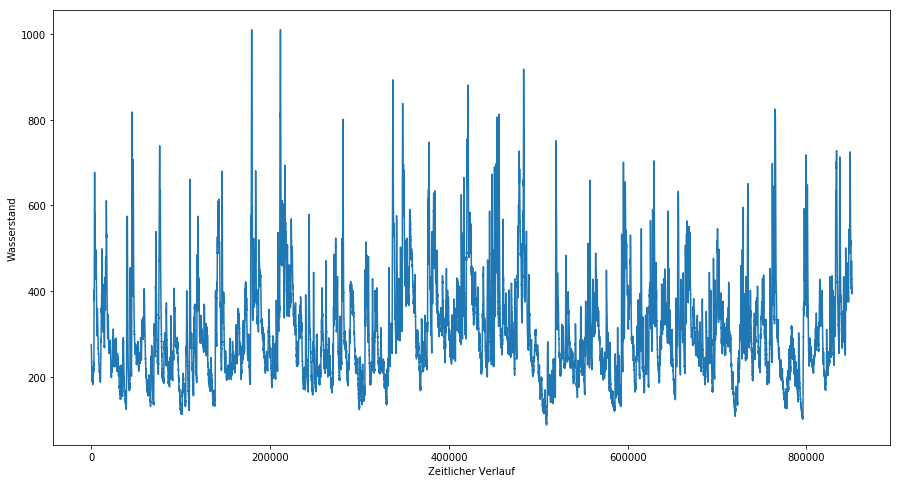

In [8]:
import matplotlib.pyplot as plt # bei mir muss man das 2-mal laufen lassen damit die plots kommen
%matplotlib inline

Bonn = no_NaN_df[['Bonn']].values

fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[:,0])), Bonn[:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

For one year (june 2012 - june 2013):

Text(0, 0.5, 'Wasserstand')

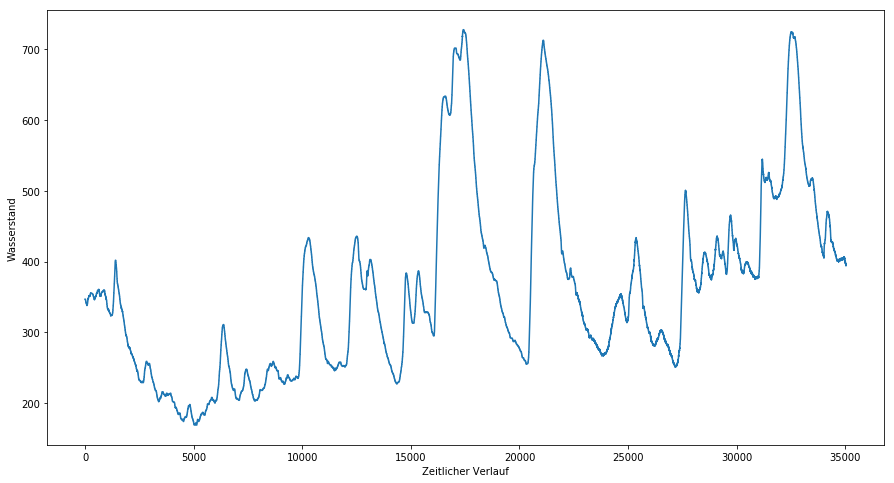

In [9]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-35040:,0])), Bonn[-35040:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

For one month (june 2013):

Text(0, 0.5, 'Wasserstand')

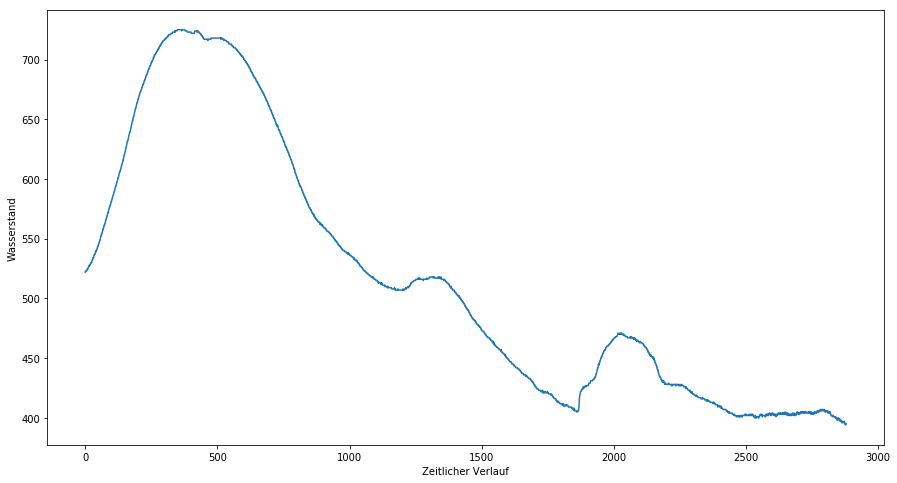

In [10]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-2880:,0])), Bonn[-2880:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

These plots suggest that there are no real seasonal effects that take less than a month. Let us see if there are significant yearly seasonal effects.

In [11]:
# Daten nach Jahr Aufteilen
yearly_data = []
for i in range(1989, 2013):
    yearly_data.append(no_NaN_df.loc[str(i) + '-01-01 00:00:00+00:00': str(i) + '-12-31 23:45:00+00:00',:])

Text(0.5, 0, 'Jahresverlauf')

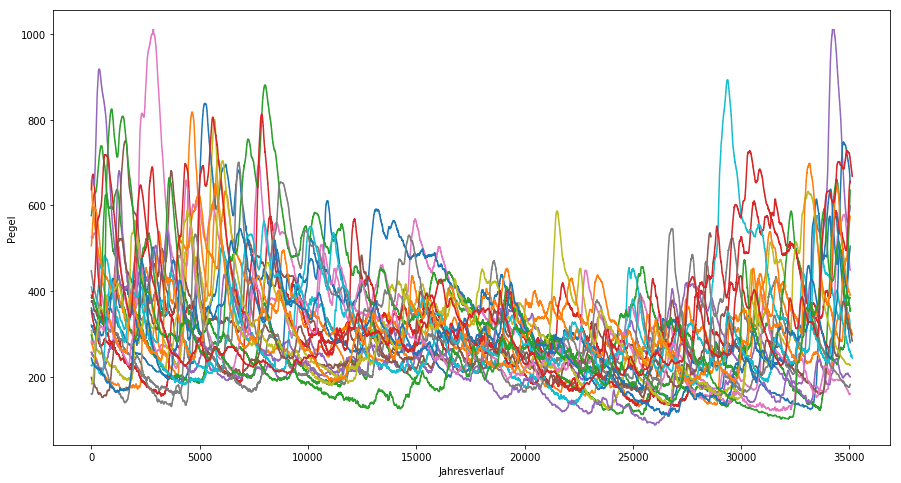

In [12]:
# zumindest ab Eintrag yearly_data[9] sind Daten vollständig
# plotte daten
fig = plt.figure(figsize=(15,8))
for i in range(0, 24):
    plt.plot(np.arange(0, len(yearly_data[i])), yearly_data[i]['Bonn'])

plt.ylabel('Pegel')
plt.xlabel('Jahresverlauf')

There are no real obvious seasonal effects. We can see that the variance is bigger in the winter and spring months than in the summer. Especially the peaks are bigger in the winter. This is not that surprising, since rivers gets more unpredictable once the snow melts in the source region of the rhine.

In [13]:
# See if the data is complete.
yearly_data_size = np.zeros(24)
for i in range(0, 24):
    yearly_data_size[i] = yearly_data[i].shape[0]
yearly_data_size

array([35040., 35040., 35040., 34080., 35037., 28611., 35040., 32160.,
       32064., 35040., 35040., 35136., 35040., 35040., 35040., 35136.,
       35040., 35040., 35040., 35135., 35040., 35040., 35040., 35136.])

The data is more or less complete. This is essential, since with a lot of missing values we would have to account for gaps and can't use a lot of time series modeling techniques, or at least do more work.

# Linear Regression Model

Linear regression is probably not the first thing that comes to mind when talking about time series analysis. However, if we model different past time steps as features this could resemble some kind of justifieable approach.

In [14]:
#imports
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

## Creation of training data

We train our linear regression model on water level measurements from every station at the following times: current as well as 15min, 30min, 1h, 3h and 6h ago. This gives us 90-dimensional data at for every point in time.

In [15]:
#get water levels out of the dataframe into an ndarray
water_levels=no_NaN_df.values 

In [16]:
#create data points

#we need to slice the arrays so data from different points in time aligns properly

#current
current_data=water_levels[24:-48]

#15min ago
last_data=water_levels[23:-49]

#30min
last2_data=water_levels[22:-50]

#1h
oneh_ago_data=water_levels[20:-52]

#3h
threeh_ago_data=water_levels[12:-60]

#6h
sixh_ago_data=water_levels[:-72]


#gather all data into a single set
independent_variable = np.c_[current_data, last_data, last2_data, oneh_ago_data, threeh_ago_data, sixh_ago_data] 


#get the water levels in Bonn into a separate variable for training
dependent_variable = no_NaN_df[['Bonn']].values

#align properly so these are 12h in the future
dependent_variable_reduced = dependent_variable[72:]

## Training of the model

We're using scikit-learn's TimeSeriesSplit function, which trains a linear regression model on successively larger batches of data, beginning with the oldest and adding more with every iteration. This way we can watch the development of the error and be more sure of the quality of the model.

We will do PCA later on, but have included the original code without PCA below in order to show the differences and the loss:

In [17]:
number_splits = 20
ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(independent_variable):
    #create train and test set
    independent_variable_train = independent_variable[train_index]
    independent_variable_test = independent_variable[test_index]
    dependent_variable_train = dependent_variable_reduced[train_index]
    dependent_variable_test = dependent_variable_reduced[test_index]
    
    #fit linear regression model
    reg = LinearRegression(fit_intercept=True, normalize =True)
    regression_model_fit = reg.fit(independent_variable_train, dependent_variable_train)
    
    #prediction on test set
    prediction_regression_model=reg.predict(independent_variable_test)
    
    #output mse
    print(np.sum(((prediction_regression_model-dependent_variable_test)**2))/dependent_variable_test.size)

    

16.195759792537284
8.888021588591112
22.03400868564462
137.1100471820402
27.21607058185847
30.054966931299344
20.712245993828184
23.096237142264275
20.04542719002709
19.13878744607539
28.416644143347884
8.992116742766136
10.264673326019008
9.814990186440037
13.713370244743963
10.504873868537404
12.061073669561829
18.36003174505899
9.725398817823208
11.168448239862771


## PCA

Training on 90-dimensional data takes quite a while. Using PCA we can reduce dimensionality to about 30 without losing much accuracy, which makes training significantly quicker. First we normalize the data so PCA works:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
independent_variable_scaled = scaler.fit_transform(independent_variable)
dependent_variable_reduced_scaled = scaler2.fit_transform(dependent_variable_reduced)

Now we run PCA:

In [19]:
pca=PCA(n_components=30)
pca.fit(independent_variable_scaled)
pca_independent_var=pca.transform(independent_variable_scaled)

Let's take a quick look at the explained variance:

Text(0, 0.5, 'Erklärte Varianz')

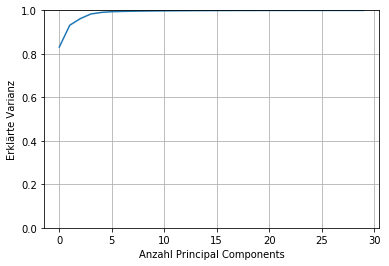

In [20]:
# Calculating the explanied variance of each Principal Component

fig = plt.figure()
ax = fig.add_subplot(111)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance)
ax.grid() 
ax.set_ylim([0,1])
ax.set_xlabel('Anzahl Principal Components')
ax.set_ylabel('Erklärte Varianz')

In [21]:
cumulative_explained_variance

array([0.83119182, 0.93181521, 0.96189974, 0.98316903, 0.99057395,
       0.99385248, 0.99514524, 0.99622859, 0.99682772, 0.99737029,
       0.99786027, 0.99820021, 0.99850514, 0.99878266, 0.9989654 ,
       0.99912336, 0.99924281, 0.99934729, 0.99944634, 0.99953402,
       0.99959653, 0.99964945, 0.99969695, 0.99972864, 0.99975836,
       0.99978472, 0.9998073 , 0.9998278 , 0.99984817, 0.99986725])

As we can see, we could have gotten 99% explained variance on only 5 components - that's just not enough for this prediction: if the water level is 500cm, 1% means 5cm, which is more inaccuracy than we can allow.

In [22]:
#run training on data transformed by pca

number_splits = 20
pca_ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(pca_independent_var):
    #create train and test set
    pca_ind_train = pca_independent_var[train_index]
    pca_ind_test = pca_independent_var[test_index]
    pca_dep_train = dependent_variable_reduced_scaled[train_index]
    pca_dep_test = dependent_variable_reduced_scaled[test_index]
    
    #fit linear regression model
    pca_reg = LinearRegression(fit_intercept=True)
    pca_regression_model_fit = pca_reg.fit(pca_ind_train, pca_dep_train)
    
    #prediction on test set
    pca_prediction_regression_model_scaled = pca_reg.predict(pca_ind_test)
    pca_prediction_regression_model = scaler2.inverse_transform(pca_reg.predict(pca_ind_test))
    
    #output mse
    residuals = pca_prediction_regression_model-scaler2.inverse_transform(pca_dep_test)
    MSE_PCA = np.sum(residuals**2)/pca_dep_test.size
    print(MSE_PCA)

20.586019843886866
11.78970760915108
26.483226886465747
138.63333216389222
31.050273599036625
32.46375538062871
22.134890511381002
26.820614320246932
24.93410318619828
21.91620841412648
35.456983491549174
12.05054211678206
13.776906447351875
11.710811372619826
17.93771399765292
13.918405868189984
16.239716608200787
24.67279795024329
13.901772029624915
13.623979861027523


## Accuracy

Now we want to know how good our prediction actually is. Therefore, we compare it to a simple model that uses the current water level as a prediction for the water level in 12h. 

In [23]:
#compute residuals
residuals_regression = dependent_variable_test-pca_prediction_regression_model

In [24]:
#simple comparison model:
#prediction for water level in 12h is the current level
#compute residuals:
comparison_model = dependent_variable[-len(dependent_variable_test):]-dependent_variable[-len(dependent_variable_test)-48:-48]

#compute mse&mae of the comparison model
mse_comparison = np.sum((comparison_model)**2)/len(comparison_model)
mae_comparison = np.sum(abs(comparison_model))/len(comparison_model)

#compute mse&mae of the prediction computed by linear regression with pca
mse_prediction = np.sum((residuals_regression)**2)/len(residuals_regression)
mae_prediction = np.sum(abs(residuals_regression))/len(residuals_regression)


#mse
print('Comparison Model:')
print('MSE:', mse_comparison)
print('MAE:', mae_comparison)


#mae
print('Regression Model:')
print('MSE:', mse_prediction)
print('MAE:', mae_prediction)

Comparison Model:
MSE: 165.93270013568522
MAE: 8.478105341063278
Regression Model:
MSE: 13.623979861027523
MAE: 2.433565380974085


As we can see, the regression is quite a lot better than the other model. This can also be observed by plotting the residuals against the water levels:

(-35, 80)

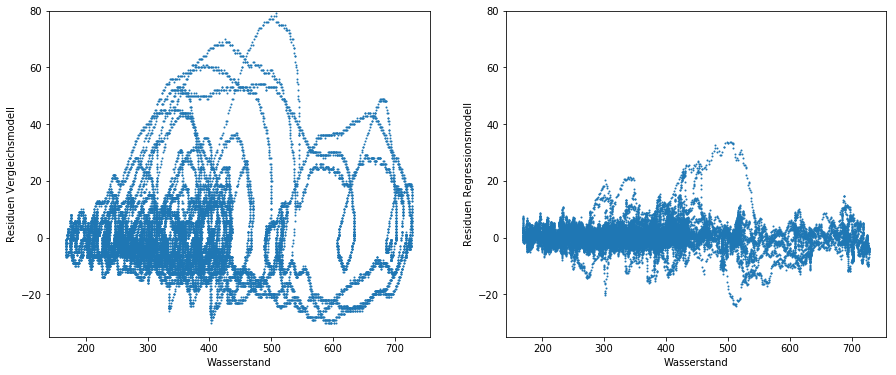

In [25]:
# plot residuals
fig, ax = plt.subplots(1,2, figsize = (15, 6))
ax[1].scatter(dependent_variable_test, residuals_regression, s = 1)
ax[0].scatter(dependent_variable_test, comparison_model, s = 1)
ax[0].set_xlabel('Wasserstand')
ax[0].set_ylabel('Residuen Vergleichsmodell')

ax[1].set_xlabel('Wasserstand')
ax[1].set_ylabel('Residuen Regressionsmodell')

ax[0].set_ylim([-35, 80])
ax[1].set_ylim([-35, 80])


This gives us the additional information that our model remains reasonably accurate even for high water levels. What is nice is that it looks reasonably close to homoscedasticity. We can also observe this in the next plot, which plots real and predicted water levels against each other:

Text(0, 0.5, 'vorhergesagter Wasserstand')

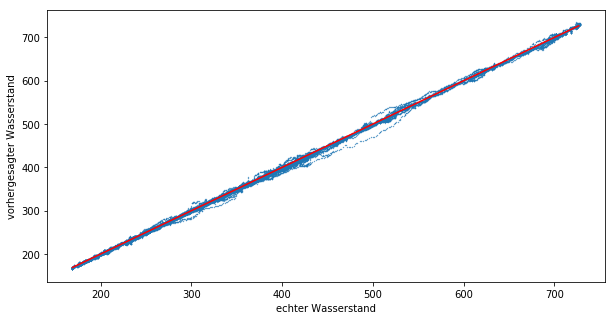

In [26]:
# plot real data <=> predictions

figure(figsize = (10,5))
plt.scatter(dependent_variable_test, prediction_regression_model, s = 0.1)
plt.plot(np.arange(min(dependent_variable_test), max(dependent_variable_test)), 
         np.arange(min((dependent_variable_test)), max(dependent_variable_test)), c = 'red')
plt.xlabel('echter Wasserstand')
plt.ylabel('vorhergesagter Wasserstand')

Finally, we take a look at a random time slice from the test set and plot real vs predicted water levels over time:

Datenindex: 18283 von 39535


Text(0, 0.5, 'Wasserstand')

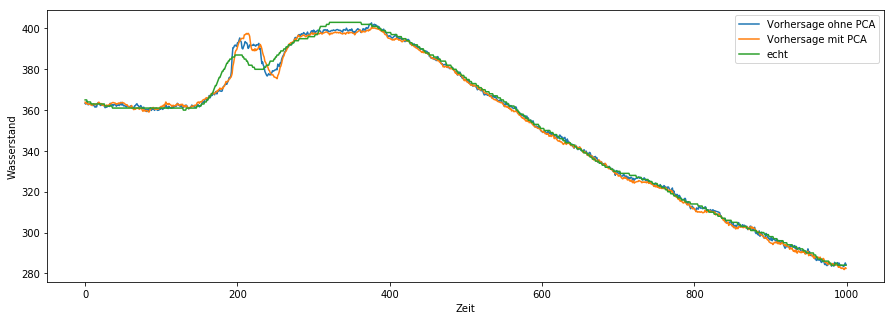

In [27]:
# plot real time series <=> predicted time series
k = 1000 # length of plotted interval
zuf_ausschnitt = np.random.randint(0,len(residuals_regression)-k)
figure(figsize = (15,5))

prediction_wo_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage ohne PCA')

prediction_with_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        pca_prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage mit PCA')

real = plt.plot(np.arange(0, min(k,len(residuals_regression))),
                dependent_variable_test[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], label = 'echt')

plt.legend()
print("Datenindex:",zuf_ausschnitt ,"von", len(residuals_regression)-k)

plt.xlabel('Zeit')
plt.ylabel('Wasserstand')


# Neural Network Model

For comparison, we also created a NN model for the problem:

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# the training set will consist of the 100.000 most recent Data points
k = 100000
anzahl_daten = independent_variable.shape[0]-k
anzahl_features = 30 #  how many principal components will we use in our data
timesteps_per_datapoint = 1 # how many different timesteps will we be looking at for every prediction
scaled_data = pca_independent_var[:anzahl_daten,:anzahl_features]
labels_NN = dependent_variable_reduced_scaled[:anzahl_daten]

Using TensorFlow backend.


In [29]:
# Erstelle Feature und Labelset und bringe sie in richtige Form:
# features_pro_datenpunkt gibt an, wieviele vergangene Zeitschritte man pro Vorhersage betrachtet
def data_preprocessing_LSTM(data, labels, timesteps_per_datapoint):
    featureset = []
    labelset = []
    
    for i in range(timesteps_per_datapoint, data.shape[0]):
        featureset.append(data[i-timesteps_per_datapoint:i,:])
        labelset.append(labels[i])
    
    # in richtige Form für keras bringen
    featureset = np.array(featureset)
    labelset = np.array(labelset)
    #featureset = np.reshape(featureset, (featureset.shape[0], featureset.shape[1], featureset.shape[2]))
    
    return featureset, labelset


In [30]:
featureset_scaled, labelset_scaled = data_preprocessing_LSTM(scaled_data, labels_NN, timesteps_per_datapoint)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam

model = Sequential()
#model.add(LSTM(10, input_shape=(featureset_scaled.shape[1], featureset_scaled.shape[2]), return_sequences = True, activation="sigmoid"))
#model.add(LSTM(10, return_sequences = True, activation="sigmoid"))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer=Adam())

In [32]:
hist = model.fit(featureset_scaled, labelset_scaled, epochs=50, batch_size=10000, verbose=2, validation_split=0.3)

Train on 525877 samples, validate on 225377 samples
Epoch 1/50
 - 1s - loss: 1.5042 - val_loss: 0.1373
Epoch 2/50
 - 1s - loss: 0.0512 - val_loss: 0.0184
Epoch 3/50
 - 1s - loss: 0.0178 - val_loss: 0.0136
Epoch 4/50
 - 1s - loss: 0.0130 - val_loss: 0.0108
Epoch 5/50
 - 1s - loss: 0.0104 - val_loss: 0.0089
Epoch 6/50
 - 1s - loss: 0.0087 - val_loss: 0.0076
Epoch 7/50
 - 1s - loss: 0.0073 - val_loss: 0.0066
Epoch 8/50
 - 1s - loss: 0.0063 - val_loss: 0.0058
Epoch 9/50
 - 1s - loss: 0.0055 - val_loss: 0.0052
Epoch 10/50
 - 1s - loss: 0.0050 - val_loss: 0.0048
Epoch 11/50
 - 1s - loss: 0.0045 - val_loss: 0.0044
Epoch 12/50
 - 1s - loss: 0.0041 - val_loss: 0.0040
Epoch 13/50
 - 1s - loss: 0.0038 - val_loss: 0.0037
Epoch 14/50
 - 1s - loss: 0.0035 - val_loss: 0.0034
Epoch 15/50
 - 1s - loss: 0.0033 - val_loss: 0.0032
Epoch 16/50
 - 1s - loss: 0.0030 - val_loss: 0.0029
Epoch 17/50
 - 1s - loss: 0.0028 - val_loss: 0.0027
Epoch 18/50
 - 1s - loss: 0.0027 - val_loss: 0.0025
Epoch 19/50
 - 1s - l

Text(0, 0.5, 'validation loss')

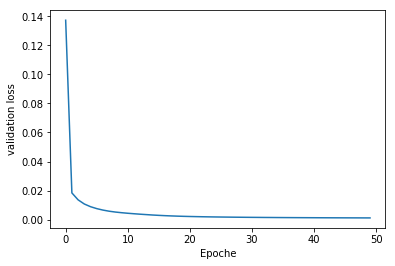

In [33]:
# plot the history of the loss on the validation set
plt.plot(hist.history["val_loss"])
plt.xlabel('Epoche')
plt.ylabel('validation loss')

In [34]:
# after training a lot of different models, we take the best performing one and test it on our testset

# initialize our testset
testset_NN = pca_independent_var[:-anzahl_daten, :anzahl_features]
labels_test_NN_temp = dependent_variable_reduced[:-anzahl_daten]
featureset_test, labelset_test_NN = data_preprocessing_LSTM(testset_NN, labels_test_NN_temp, timesteps_per_datapoint)


In [35]:
predictions_NN_scaled = model.predict(featureset_test)

In [36]:
# Since we use normalized Data in our NN we have to revert them back to get our MSE
predictions_NN = scaler2.inverse_transform(predictions_NN_scaled)
labelset = scaler2.inverse_transform(dependent_variable_reduced_scaled[:-anzahl_daten])

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_NN = mean_squared_error(labelset_test_NN, predictions_NN)
MAE_NN = mean_absolute_error(labelset_test_NN, predictions_NN)
print("MSE_NN:", MSE_NN)
print("MAE_NN:", MAE_NN)


MSE_NN: 17.102344214154865
MAE_NN: 2.855911287689537


Text(0, 0.5, 'Wasserstand')

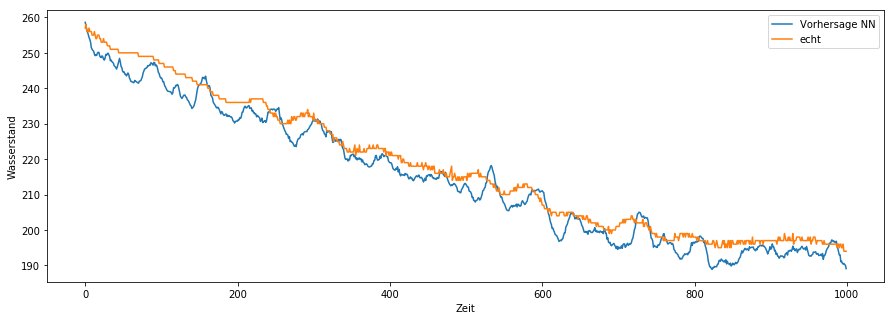

In [38]:
# plot first 1000 data points of the training set

figure(figsize = (15,5))

cc = plt.plot(np.arange(0, 1000), 
                        predictions_NN[:1000], 
                        label = 'Vorhersage NN')
dd = plt.plot(np.arange(0, 1000), 
                        labelset[:1000], 
                        label = 'echt')
plt.legend()

plt.xlabel('Zeit')
plt.ylabel('Wasserstand')

## Closing remarks

There is a lot of optimizing still possible.
- modeling residuals as a time series in the linear regression case
- a lot of more sophisticated feature selection approaches
- standardize data set
- exponential smoothing of predictions in the linear regression case